In [1]:
2+2

4

# Real-Time Sign Language Recognition Using Computer Vision & Machine Learning

## Abstract
Sign Language Recognition (SLR) systems bridge the communication gap between individuals with speech and hearing impairments and those without. This project presents a machine learning-based method to recognize American Sign Language (ASL) fingerspelling gestures with 95.7% accuracy, covering all 26 letters of the alphabet. The system processes hand gestures, filters them, and applies a classifier to predict the correct ASL letter. Using neural networks and image processing techniques, this approach offers a promising tool for improving communication accessibility.

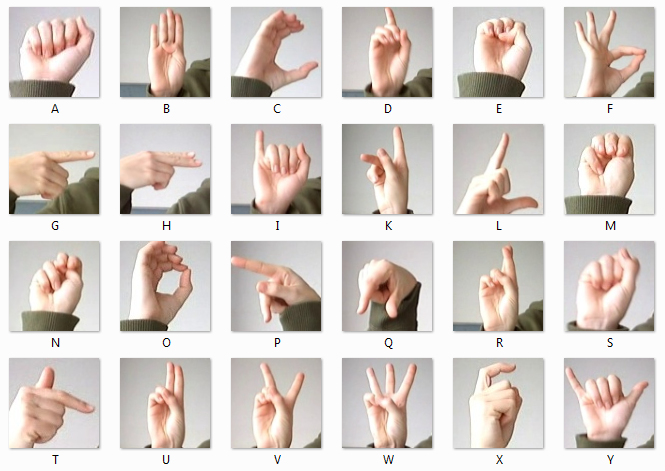

## Dataset
This project leverages the Sign Language MNIST dataset, a reworked version of the classic MNIST format, specifically designed for ASL fingerspelling. Key features of the dataset:

* Classes: 24 classes for ASL letters A-Z, excluding "J" and "Z," as these require motion.
* Format: Each image is a 28x28 grayscale (0-255) pixel image stored as CSV rows with labels.
* Size: Training set includes 27,455 images, while the test set comprises 7,172 images.
* Data Augmentation: The original hand gestures were augmented with various filters and transformations to improve model robustness and generalization. * Augmentations included cropping, resizing, gray-scaling, pixelation, brightness adjustments, and slight rotations.

## Project Overview
1. Problem Statement:
   
Recognizing ASL gestures in real-time requires both accuracy and efficiency due to the dynamic nature of hand gestures and finger positions. Our goal is to create a model capable of accurately recognizing these static gestures in real-time, enabling smoother communication between ASL users and non-users.
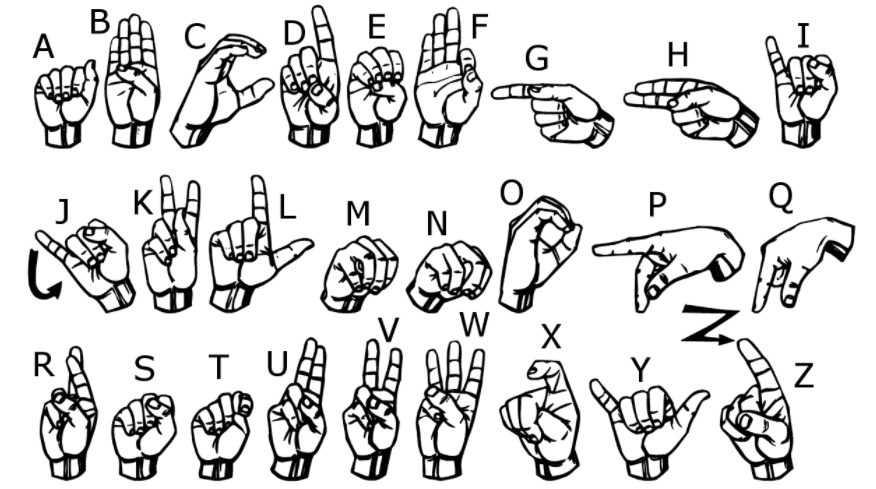

3. Methodology:
   
* Image Preprocessing: Hand gestures are preprocessed with image enhancements to improve class separability.
* Model Architecture: A convolutional neural network (CNN) is employed to classify each gesture.
* Training and Evaluation: The model was trained on the Sign Language MNIST dataset and evaluated on a separate test set, achieving 95.7% accuracy.

4.  Key Technologies: 
* Machine Learning: Neural networks, specifically CNNs, for image classification.
* Image Processing: OpenCV and ImageMagick for preprocessing images.

In [3]:
# Installs the OpenCV library for Python, which provides tools for computer vision and image processing tasks.
!pip install opencv-python

  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)


In [7]:
# Installs the TensorFlow library, which is a powerful framework for building and training machine learning and deep learning models.
!pip install tensorflow

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     --------------------------------- ------ 41.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.3/390.3 MB 10.6 MB/s eta 0:00:37
   ---------------------------------------- 0.4/390.3 MB 4.5 MB/s eta 0:01:28
   ---------------------------------------- 1.5/390.3 MB 10.9 MB/s eta 0:00:36
   ---------------------------------------- 1.6/390.3 MB 8.5 MB/s eta 0:00:46
   ---------------------------------------- 3.4/390.3 MB 14.6 MB/s eta 0:00:27
   ---------------------------------------- 4.4/390.3 MB 16.6 MB/s eta 0:00:24
    --------------------------------------- 6.0/390.3 MB 18.2 MB/s eta 0:00:22
    --------------------------------------- 6.8/390.3 MB 18.9 MB/s eta 0:00:21
    --------------------------------------- 8.2/390.3 MB 19.4 MB/s eta 0:0

In [4]:
# Lets now import OpenCV library, which provides tools for image and video processing and check the version
import cv2
print(cv2.__version__)

4.10.0


## Section 1:

Perfect we have openCV running and we should go ahead and import our data now

To prepare and clean the dataset for our Sign Language Recognition project, we start with reading the data files and organizing them into useful formats for analysis and modeling.

Here are the steps we will take: 
1. Data Loading: We will load the training and test datasets, and the label column (containing the class for each image) is separated.
2. Data Visualization: We will visiualize the label distribution using a bar plot to see class representation.
3. Image Reshaping: Each image will be reshaped to 28x28 pixels and flattened, preparing it for model training.
4. Label Encoding: Labels will be encoded into a binary format (one-hot encoding), which is ideal for classification tasks.
5. Image Display with OpenCV: Randomly selected images will be enlarged and displayed one by one for visual inspection.

In [4]:
# Importing our data
test= pd.read_csv("data/mnist/sign_mnist_test.csv")

In [4]:
# Importing essential libraries for data manipulation, visualization, and numerical operations.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset files for sign language recognition.

test= pd.read_csv("data/mnist/sign_mnist_test.csv")
train = pd.read_csv("data/mnist/sign_mnist_train.csv")
train.head()


label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel784  
0       206       204       203       202  
1       175       103       135       149  
2       198       195       194       195  
3       225       222       229       163  
4       157       163       164       179  

[5 rows x 785 columns]

In [5]:
test.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      6     149     149     150     150     150     151     151     150   
1      5     126     128     131     132     133     134     135     135   
2     10      85      88      92      96     105     123     135     143   
3      0     203     205     207     206     207     209     210     209   
4      3     188     191     193     195     199     201     202     203   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     151  ...       138       148       127        89        82        96   
1     136  ...        47       104       194       183       186       184   
2     147  ...        68       166       242       227       230       227   
3     210  ...       154       248       247       248       253       236   
4     203  ...        26        40        64        48        29        46   

   pixel781  pixel782  pixel783  pixel784  
0       106       112       120       107  
1       184       184       182       180  
2       226       225       224       222  
3       230       240       253       255  
4        49        46        46        53  

[5 rows x 785 columns]

In [9]:
labels = train['label'].values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [10]:

# Extracting the 'label' column, which contains the target class for each image. of which the label is pixel 784
labels = train['label'].values
# Getting unique label values to check the number of classes in the dataset.
unique_val = np.array(labels)
np.unique(unique_val) # Lists unique values in the labels array, representing each ASL letter.



array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [ ]:
# Visualizing the distribution of each label in the training dataset.
plt.figure(figsize = (18,8))
sns.countplot(x = labels)# Creates a count plot of the labels, showing class distribution.

# Lets now the 'label' column from the training data to isolate image pixel values.
train.drop('label', axis = 1,inplace = True)

# Converting the images to 28x28 NumPy arrays for processing.
images = train.values
images = np.array([np.reshape(i,(28,28))for i in images])# Reshapes each image into 28x28 format.
images = np.array([i.flatten() for i in images])# Flattens each 28x28 image into a 1D array (useful for certain models).



[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


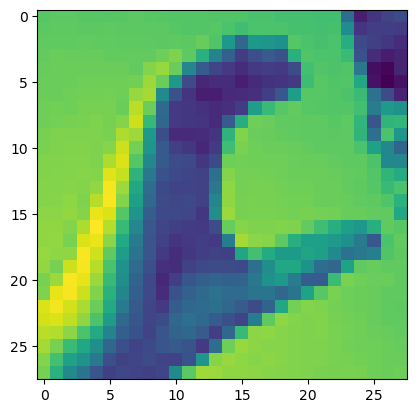

In [25]:
# Encoding labels as binary vectors for model training (e.g., 'one-hot' encoding).
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)# Converts each label to a binary vector.
labels

# Verifying label transformation with an example.
index = 2
print(labels[index])# Prints the binary encoded label at the specified index

# Visualizing a sample image from the dataset.
plt.imshow(images[index].reshape(28,28))# Reshapes and displays the image at the specified index.


# Importing the OpenCV library for image resizing and display operations.
import cv2
import numpy as np

# Displaying 10 random images from the dataset after resizing with OpenCV.
for i in range(0,10):
    rand = np.random.randint(0, len(images))# Selects a random index within the image dataset.
    input_im = images[rand] # Retrieves a random image.
    sample = input_im.reshape(28,28).astype(np.uint8) # Reshapes and converts to unsigned integer for display.
    sample = cv2.resize(sample, None, fx=10, fy=10, interpolation = cv2.INTER_CUBIC)# Enlarges the image by 10x for better visibility.
    cv2.imshow("sample image",sample) # Displays the sample image in a new window.
    cv2.waitKey(0) # Waits for a key press before closing the image.

# Closes all OpenCV windows after displaying images.
cv2.destroyAllWindows() 

In [20]:
labels[2]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [26]:
images[2]

array([187, 188, 188, 187, 187, 186, 187, 188, 187, 186, 185, 185, 185,
       184, 184, 184, 181, 181, 179, 179, 179, 178, 178, 109,  52,  66,
        77,  83, 188, 189, 189, 188, 188, 189, 188, 188, 188, 188, 187,
       185, 185, 187, 182, 177, 182, 182, 182, 180, 180, 179, 180, 135,
        67,  73,  73,  71, 190, 190, 190, 191, 190, 190, 189, 189, 189,
       188, 189, 188, 192, 184, 144, 103, 144, 142, 138, 186, 182, 180,
       182, 163,  81,  74,  68,  61, 191, 193, 192, 192, 192, 191, 191,
       191, 191, 195, 200, 189, 165, 127,  98,  71,  85,  94,  86, 165,
       184, 182, 182, 175,  87,  61,  51,  56, 192, 193, 194, 193, 193,
       193, 194, 191, 202, 208, 193, 130,  95,  78,  69,  62,  69,  72,
        69,  83, 179, 184, 183, 184, 116,  43,  38,  56, 193, 193, 194,
       195, 195, 195, 195, 196, 209, 193, 144,  83,  58,  61,  62,  52,
        60,  65,  66,  70, 176, 187, 184, 185, 158,  45,  35,  45, 194,
       194, 195, 196, 196, 197, 195, 208, 212, 133,  86,  67,  5

In [27]:
len(images), len(labels)

(27455, 27455)

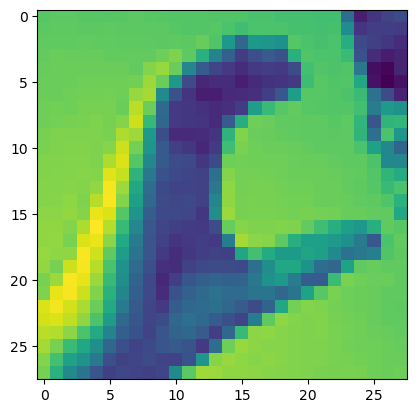

In [23]:
plt.imshow(images[index].reshape(28,28))

In [24]:
train.values

array([[107, 118, 127, ..., 204, 203, 202],
       [155, 157, 156, ..., 103, 135, 149],
       [187, 188, 188, ..., 195, 194, 195],
       ...,
       [174, 174, 174, ..., 202, 200, 200],
       [177, 181, 184, ...,  64,  87,  93],
       [179, 180, 180, ..., 205, 209, 215]], dtype=int64)

## Splitting our dataset into Training and Testing

This section prepares the dataset for training a Convolutional Neural Network (CNN) to recognize American Sign Language (ASL) gestures. It includes the following key steps:

1. Label Encoding: Converts categorical labels into binary vectors for effective multi-class classification.

2. Dataset Splitting: Utilizes train_test_split from scikit-learn to divide the dataset into training (70%) and testing (30%) sets, ensuring reproducibility with a set random state.

3. Keras Component Imports: Essential modules from TensorFlow Keras are imported for building the CNN architecture.

4. Hyperparameter Definitions: Key training parameters are set:

* Batch Size: Number of samples processed before updating model weights (set to 128).
* Number of Classes: Total unique ASL classes (24, excluding 'J' and 'Z').
* Epochs: Number of passes through the training dataset (set to 10).


This will enable us effectively in training and evaluating the CNN model, laying the groundwork for accurate ASL gesture recognition.


In [28]:

# Importing train_test_split from sklearn to split the dataset into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

# Importing necessary layers and modules from TensorFlow Keras for building the CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

# Setting hyperparameters for model training
batch_size = 128
num_classes = 24
epochs = 10

### Data Normalization and Reshaping for CNN Input

Lets now reshape the training and testing image datasets to prepare them for input into the Convolutional Neural Network (CNN) model.

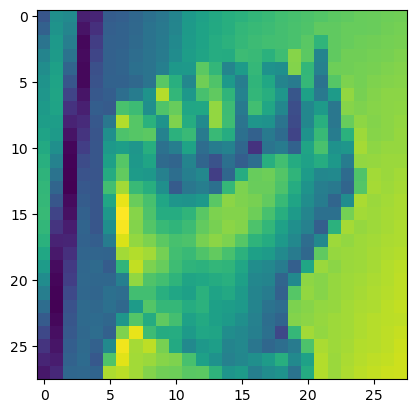

In [29]:
# Normalize the pixel values of the training and test images to the range [0, 1]
x_train = x_train / 255
x_test = x_test / 255

# Reshape the training and test images to include a channel dimension for the CNN input
x_train  = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test  = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Visualize the first training image to verify correct processing
plt.imshow(x_train[0].reshape(28,28))

 ## Building a CNN model

**Overall, this CNN model architecture will be designed to effectively learn and classify ASL gestures from the input images, leveraging multiple layers to extract features and reduce dimensionality, ultimately making accurate predictions for each class of hand gestures.**

Here is a summary of what is done:

1. Model Initialization: A Sequential model is created, allowing layers to be added in a linear stack.

2. Convolutional Layers:

Three convolutional layers are added, each with 64 filters and a kernel size of 3x3. The ReLU (Rectified Linear Unit) activation function is used, which helps the model learn complex patterns by introducing non-linearity.
These layers are responsible for extracting features from the input images.

3. Max Pooling Layers:

Following each convolutional layer, a max pooling layer is added with a pool size of 2x2. This layer reduces the spatial dimensions (height and width) of the feature maps, retaining the most significant features while reducing computational load and overfitting.

4. Flattening:

After the convolutional and pooling layers, the output is flattened into a one-dimensional array. This step prepares the data for input into the fully connected layers.

5. Dense Layer:

A fully connected (dense) layer with 128 neurons and a ReLU activation function is added. This layer helps in learning high-level representations of the features extracted from the previous layers.

6. Dropout Layer:

A dropout layer with a rate of 20% is included to prevent overfitting by randomly setting a fraction of the input units to zero during training.

7. Output Layer:

The final output layer has a number of neurons equal to the number of classes (ASL letters) and uses the softmax activation function. This layer produces probability distributions over the classes, allowing the model to make predictions.

8. Model Compilation:

The model is compiled using categorical crossentropy as the loss function, the Adam optimizer for efficient training, and accuracy as a metric for evaluation. This setup prepares the model for training on the dataset.


In [30]:

# Importing necessary layers and modules from TensorFlow Keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras import backend as K 
from tensorflow.keras.optimizers import Adam

# Initializing a Sequential model
model = Sequential()


# Adding the first convolutional layer
# 64 filters, kernel size of 3x3, ReLU activation function, 
# input shape is (28, 28, 1) for grayscale images
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28,1)))

# Adding the first max pooling layer, It Reduces the spatial dimensions (height and width) by taking the max over 2x2 pooling windows
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation = 'relu')) # Adding the second convolutional layer, 64 filters, kernel size of 3x3, ReLU activation function
model.add(MaxPooling2D(pool_size = (2, 2))) # Adding the second max pooling layer, Further reduces the spatial dimensions
model.add(Conv2D(64, kernel_size=(3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten()) # Flattening the output from the convolutional layers to feed into the fully connected layer
model.add(Dense (128, activation = 'relu')) # Adding a fully connected (dense) layer with 128 neurons and ReLU activation

# Adding dropout to prevent overfitting, 20% of the neurons will be randomly dropped during training
model.add(Dropout (0.20))

# Adding the output layer
# num_classes is the number of unique classes (ASL letters)
# Using softmax activation for multi-class classification
model.add(Dense (num_classes, activation = 'softmax'))

# Compiling the model
# Setting the loss function to categorical crossentropy, 
# using the Adam optimizer, and tracking accuracy as a metric
model.compile(loss = 'categorical_crossentropy',
              optimizer= Adam(),
              metrics=['accuracy'])

C:\Users\Name\Desktop\Machine\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## **TRAINING THE MODEL**

In [32]:

# Train the CNN model on the training dataset and evaluate on the validation dataset, 
# tracking loss and accuracy over specified epochs and batch size.

history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.0864 - loss: 3.0343 - val_accuracy: 0.4840 - val_loss: 1.6496
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - accuracy: 0.5372 - loss: 1.4195 - val_accuracy: 0.7840 - val_loss: 0.7355
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.7339 - loss: 0.7832 - val_accuracy: 0.8509 - val_loss: 0.4688
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.8261 - loss: 0.5129 - val_accuracy: 0.9171 - val_loss: 0.2885
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.8862 - loss: 0.3357 - val_accuracy: 0.9489 - val_loss: 0.1830
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.9215 - loss: 0.2356 - val_accuracy: 0.9696 - val_loss: 0.1172
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.9466 - loss: 0.1644 - val_accuracy: 0.9873 - val_loss: 0.0717
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - accuracy: 0.9617 - loss: 0.1222 - val_ac

In [33]:

# Lets now save the model

model.save("sign_mnist_cnn_50_Epochs.h5")
print("Model Saved")

Model Saved


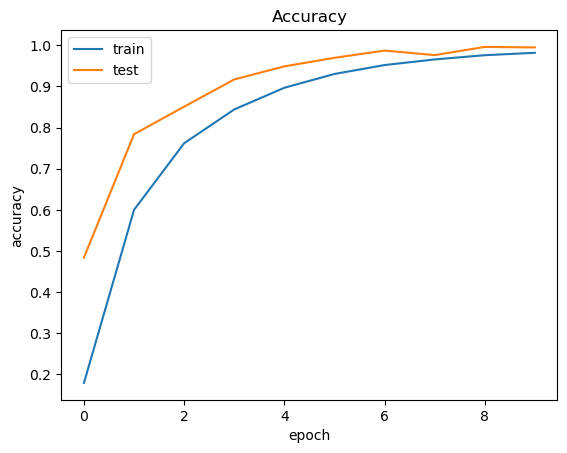

In [34]:

# Plot the training and validation accuracy over epochs to visualize model performance
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.show()

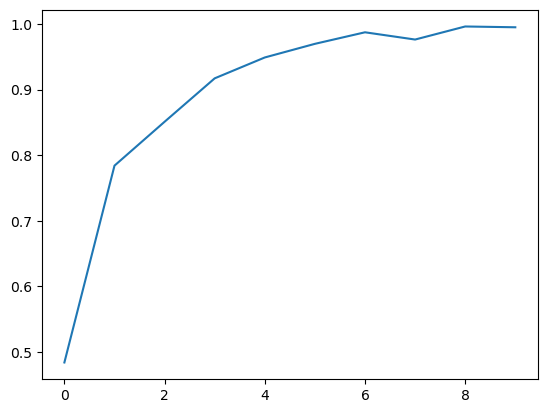

In [36]:
plt.plot(history.history['val_accuracy'])

In [37]:
# Step 8. Testing the model

# Extract the labels from the test DataFrame for evaluation
test_labels = test['label']
test.drop('label', axis = 1, inplace = True)

# Get the image data as a NumPy array
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])# Reshape each image from a flat array to a 28x28 matrix

# Flatten the reshaped images into 1D vectors for model input
test_images = np.array([i.flatten() for i in test_images])# Convert each 28x28 image into a 784-dimensional vector

# One-hot encode the labels for compatibility with the model output
# Transform the test labels into a binary format using LabelBinarizer
test_labels = label_binrizer.fit_transform(test_labels)

# Reshape images for input into the CNN model (adding channel dimension)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1) # Reshape to include a single channel for grayscale images
test_images.shape

# Predict labels for the test images using the trained model
y_pred = model.predict(test_images)

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [38]:
# TESTING ACCURACY

from sklearn.metrics import accuracy_score
accuracy_score(test_labels, y_pred.round())

0.850111544896821

## LABELLING
This function facilitates the interpretation of model predictions, allowing for easy mapping of numerical outputs to recognizable sign language letters.
It will use a dictionary, classLabels, to define the relationship between class indices (0 to 23) and ASL letters ('A' to 'Y', excluding 'J' and 'Z')

In [40]:
# 

# Define a dictionary to map class indices to their corresponding letters in American Sign Language
def getLetter(result): 
    classLabels = { 0:'A',
                    1:'B',
                    2:'C',
                    3:'D',
                    4:'E',
                    5:'F',
                    6:'G',
                    7:'H',
                    8:'I',
                    9:'K',
                    10:'L',
                    11:'M',
                    12:'N',
                    13:'0', 
                    14:'P',
                    15:'Q',
                    16:'R',
                    17:'S',
                    18:'T',
                    19:'U',
                    20:'V',
                    21:'W',
                    22:'X',
                    23:'Y'}
    try:
        # Convert the result to an integer, which represents the predicted class index
        res = int(result)

        # Return the corresponding letter from the classLabels dictionary
        return classLabels[res]
    except:
        # Return an error message if the result cannot be converted to an integer
      return "Error"

## PREDCTING ON LIVE WEBCAM

This final section captures live video from the default camera and processes the frames in real-time for sign language recognition. It defines a specific region of interest (ROI) within the captured frame, which is then converted to grayscale and resized to 28x28 pixels to match the input requirements of the trained model. A rectangle is drawn around the ROI for visual reference, and the model predicts the corresponding sign language letter from this region. The predicted letter is overlaid onto the original frame, allowing for real-time feedback. The loop continues to capture and process frames until the Enter key is pressed, at which point the video capture is released, and all OpenCV windows are closed. This code demonstrates a practical application of computer vision and machine learning for real-time sign language interpretation.

Here is how we will do it: 
* **Video Capture Initialization**: The code begins by setting up the video capture from the default camera.
* **Frame Processing Loop**: Inside the infinite loop, each frame is read, and the region of interest (ROI) is defined and displayed.
* **Image Preprocessing**: The ROI is converted to grayscale and resized to fit the model's input requirements.
* **Drawing Rectangle**: A rectangle is drawn around the ROI in the original frame for better visibility.
* **Model Prediction**: The reshaped ROI is passed to the model for prediction, and the result is displayed on the original frame.
* **Display and Exit Conditions**: The modified frame is shown, and the loop will exit if the Enter key is pressed.
* **Cleanup**: Finally, the video capture is released, and all OpenCV windows are closed.

In [41]:

# Initialize video capture object to capture video from the default camera (index 0)
cap = cv2.VideoCapture(0)

# Start an infinite loop to continuously capture frames from the camera
while True:
    
    ret, frame = cap.read() # Read a frame from the camera

    # Define the region of interest (ROI) for sign language recognition
    roi = frame[100:400, 320:620] # Crop the frame to get a specific area for processing
    cv2.imshow('roi', roi) # Display the cropped region (ROI)
    
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY) # Convert the ROI from BGR to grayscale

    # Resize the grayscale ROI to 28x28 pixels to match the input size expected by the model
    roi = cv2.resize(roi, (28, 28), interpolation = cv2.INTER_AREA) 
    cv2.imshow('roi sacled and gray', roi) # Show the scaled and grayscale ROI

    # Create a copy of the original frame for displaying results
    copy = frame.copy() 

    # Draw a rectangle around the ROI in the original frame for visual reference
    cv2.rectangle(copy, (320, 100), (620, 400), (255,0,0), 5) # Draws a blue rectangle

    
    roi = roi.reshape(1,28,28,1) # Reshape the ROI to add a batch dimension and a channel dimension for the model input
    result = str(np.argmax(model.predict(roi, 1, verbose = 0),axis=1)[0]) # Use the trained model to predict the letter from the ROI

    # Overlay the predicted letter onto the original frame at specified coordinates
    cv2.putText(copy, getLetter(result), (300 , 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    cv2.imshow('frame', copy) # Display the modified frame with the prediction

    # Exit the loop if the Enter key is pressed (key code 13)
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break

# Release the video capture object and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()

## Results in practical
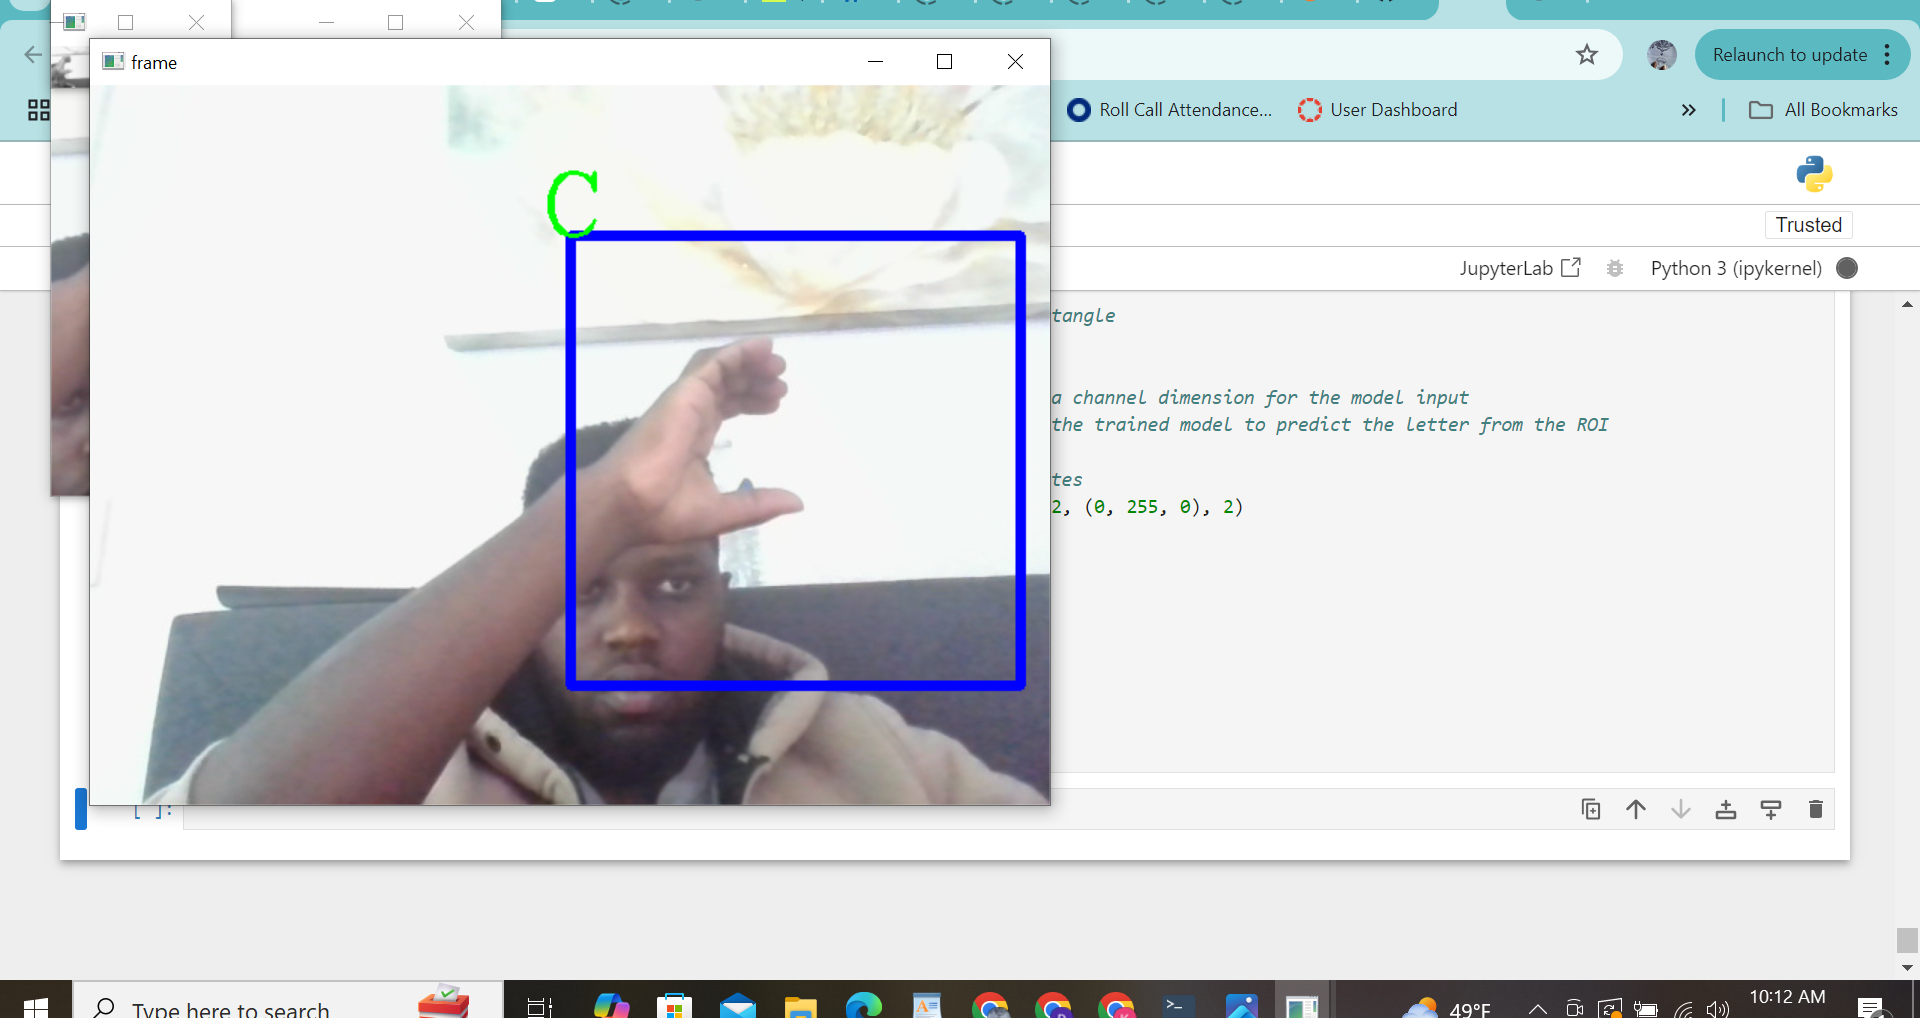!
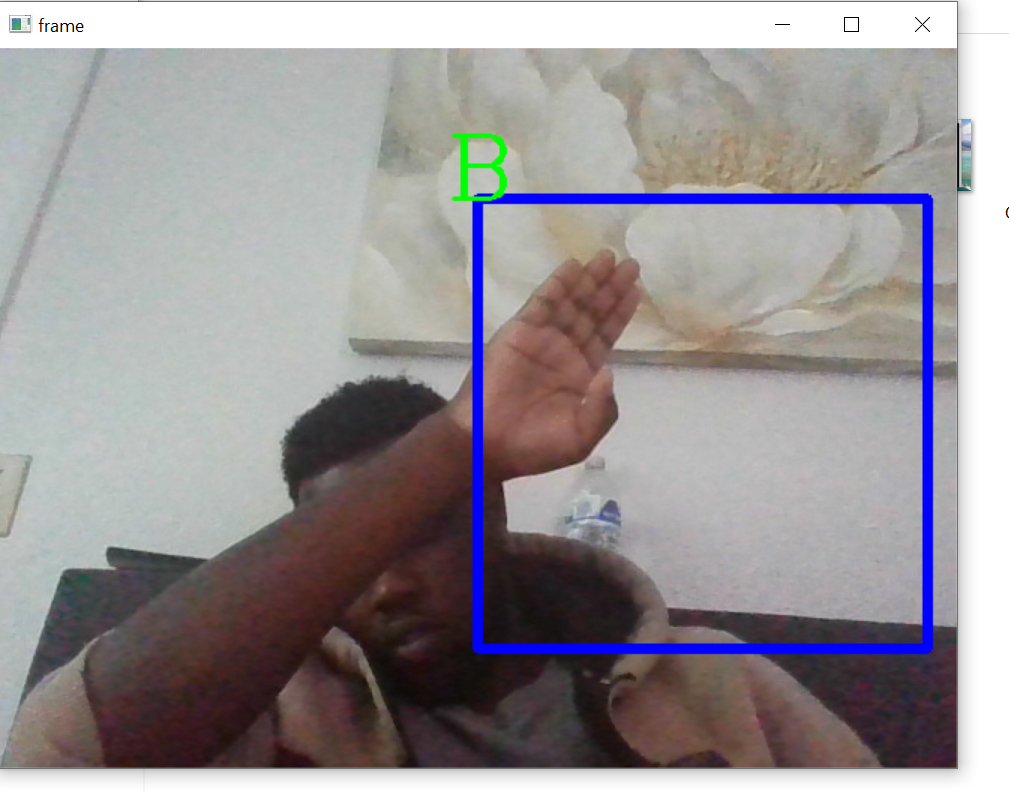!
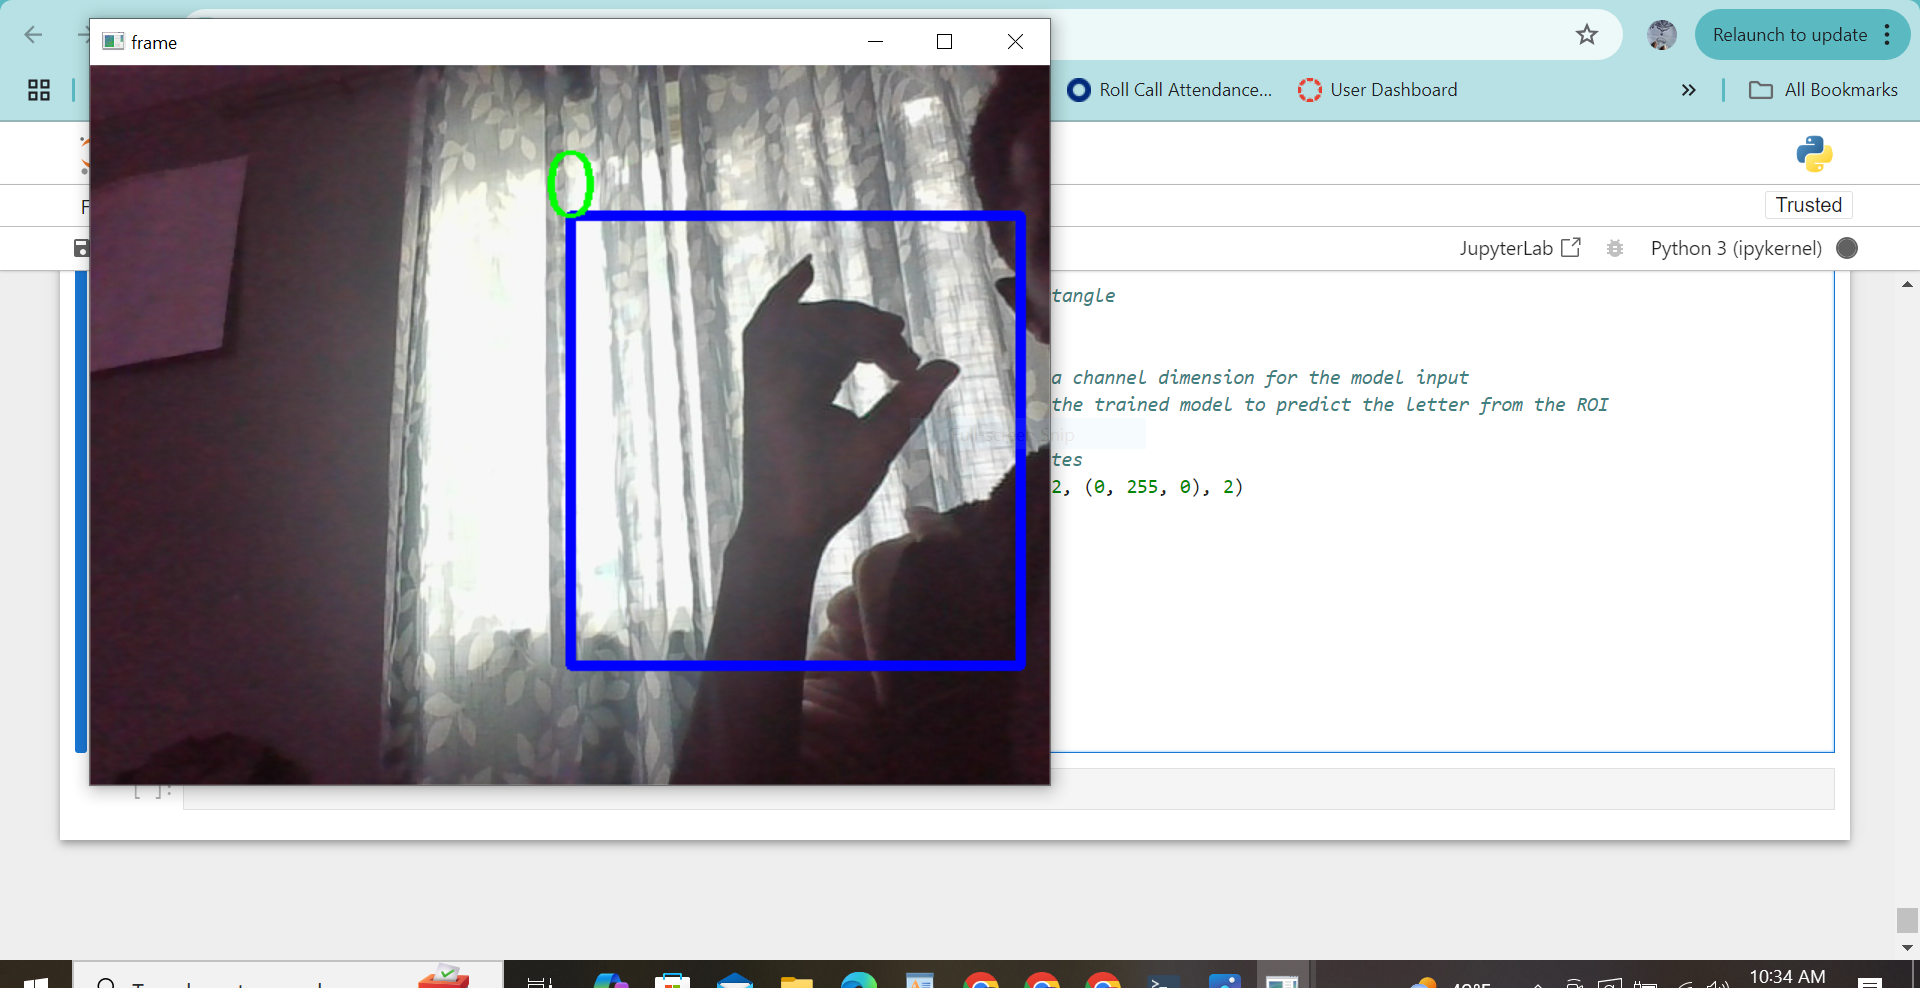!